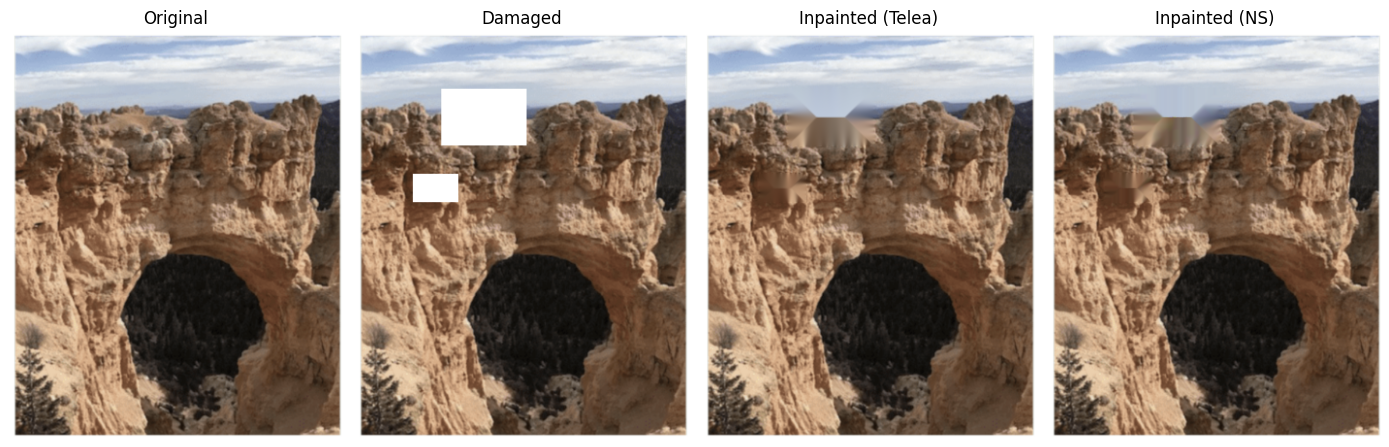

In [ ]:
# i) Image Inpainting


import cv2
import numpy as np
import matplotlib.pyplot as plt


img_path = "/content/Inpainting.png"
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# damage by drawing white boxes
mask = np.zeros(image.shape[:2], np.uint8)
mask[100:200, 150:300] = 255
mask[250:300, 100:180] = 255

damaged = image.copy()
damaged[mask == 255] = 255  # Draw white on mask area

# Inpainting using OpenCV
inpainted_telea = cv2.inpaint(damaged, mask, 3, cv2.INPAINT_TELEA)
inpainted_ns = cv2.inpaint(damaged, mask, 3, cv2.INPAINT_NS)


plt.figure(figsize=(14, 6))
titles = ["Original", "Damaged", "Inpainted (Telea)", "Inpainted (NS)"]
images = [image, damaged, inpainted_telea, inpainted_ns]

for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

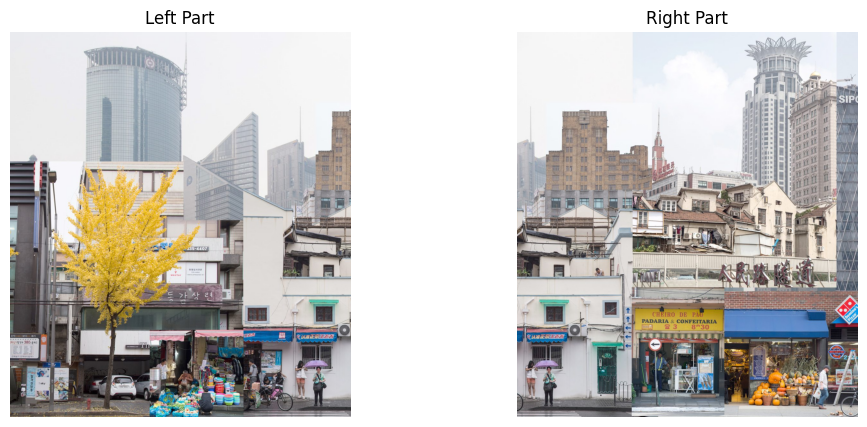

Image stitching successful!


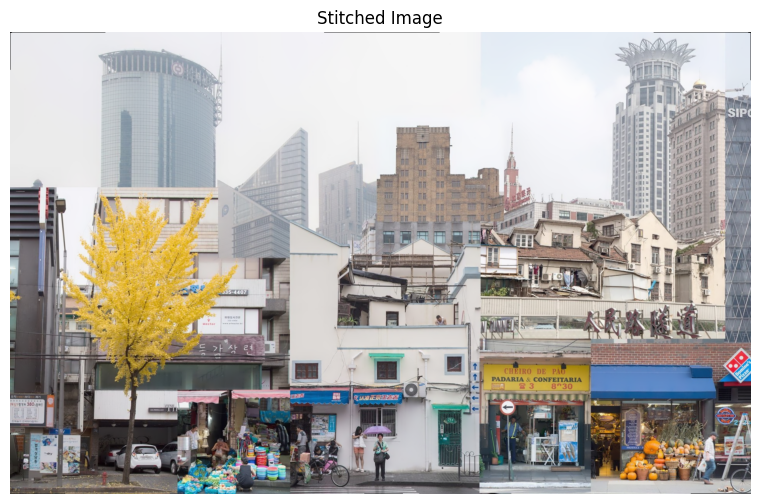

In [ ]:
import cv2
import matplotlib.pyplot as plt


img = cv2.imread('/content/image_stitch.jpg')

# overlap
height, width, _ = img.shape
overlap = 100  # pixels

# left and right images with overlap
left_img = img[:, :width//2 + overlap]
right_img = img[:, width//2 - overlap:]

# Save for stitching
cv2.imwrite("left_part.jpg", left_img)
cv2.imwrite("right_part.jpg", right_img)


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(left_img, cv2.COLOR_BGR2RGB))
plt.title("Left Part")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(right_img, cv2.COLOR_BGR2RGB))
plt.title("Right Part")
plt.axis('off')
plt.show()

# Stitching two parts back together

left_img = cv2.imread("left_part.jpg")
right_img = cv2.imread("right_part.jpg")


stitcher = cv2.Stitcher_create()
status, stitched = stitcher.stitch([left_img, right_img])


if status == cv2.Stitcher_OK:
    print("Image stitching successful!")
    stitched_rgb = cv2.cvtColor(stitched, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(15, 6))
    plt.imshow(stitched_rgb)
    plt.axis('off')
    plt.title("Stitched Image")
    plt.show()
else:
    print("Image stitching failed. Status code:", status)


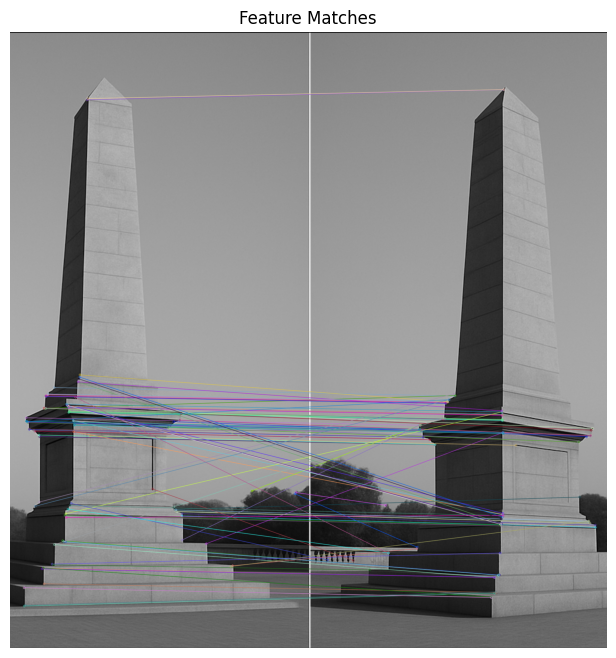

Fundamental Matrix:
 [[ 2.53412743e-08 -8.92643565e-07  1.33468572e-03]
 [ 2.50703944e-06  6.73135777e-07  4.03532927e-03]
 [-3.69217424e-03 -5.81769053e-03  1.00000000e+00]]
Essential Matrix:
 [[ 0.01773056  0.16578934 -0.18361248]
 [-0.02241581 -0.00579765  0.68050045]
 [-0.0470909  -0.68554027 -0.05182682]]
Rotation:
 [[ 0.92276436 -0.32610067 -0.20533945]
 [ 0.33691929  0.94133941  0.0191181 ]
 [ 0.18705969 -0.08682432  0.97850407]]
Translation:
 [[0.93646781]
 [0.26975194]
 [0.22419171]]


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img1 = cv2.imread('/content/image1.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('/content/image2.png', cv2.IMREAD_GRAYSCALE)

# ORB features and compute descriptors
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)


bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)[:100]


img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, flags=2)
plt.figure(figsize=(15, 8))
plt.title("Feature Matches")
plt.imshow(img_matches)
plt.axis("off")
plt.show()


pts1 = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
pts2 = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

# Fundamental Matrix
F, mask_f = cv2.findFundamentalMat(pts1, pts2, cv2.FM_RANSAC)
print("Fundamental Matrix:\n", F)

# Intrinsic camera matrix
K = np.array([[718.8560, 0, 607.1928],
              [0, 718.8560, 185.2157],
              [0, 0, 1]])

# Essential Matrix
E, mask_e = cv2.findEssentialMat(pts1, pts2, K, method=cv2.RANSAC, threshold=1.0)
print("Essential Matrix:\n", E)

# Recover pose
_, R, t, mask_pose = cv2.recoverPose(E, pts1, pts2, K)
print("Rotation:\n", R)
print("Translation:\n", t)


ERROR: Could not find a version that satisfies the requirement tensorflow==2.11 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0)
ERROR: No matching distribution found for tensorflow==2.11
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 2, 2, 256)      │       590,080 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 4, 4, 128)      │       295,040 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 8, 8, 64)       │        73,792 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,367,425 (5.22 MB)

 Trainable params: 1,366,465 (5.21 MB)

 Non-trainable params: 960 (3.75 KB)

Epoch 1/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - loss: 0.0257 - val_loss: 0.0437
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - loss: 0.0150 - val_loss: 0.0164
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0132 - val_loss: 0.0147
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 0.0120 - val_loss: 0.0135
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0115 - val_loss: 0.0129
Epoch 6/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0108 - val_loss: 0.0125
Epoch 7/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0104 - val_loss: 0.0112
Epoch 8/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 0.0101 - val_loss: 0.0108
Epoch 9/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 0.0097 - val_loss: 0.0121
Epoch 10/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0094 - val_loss: 0.0102
Epoch 11/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0091 - val_loss: 0.0094
Epoch 12/100
391/391 ━━━━

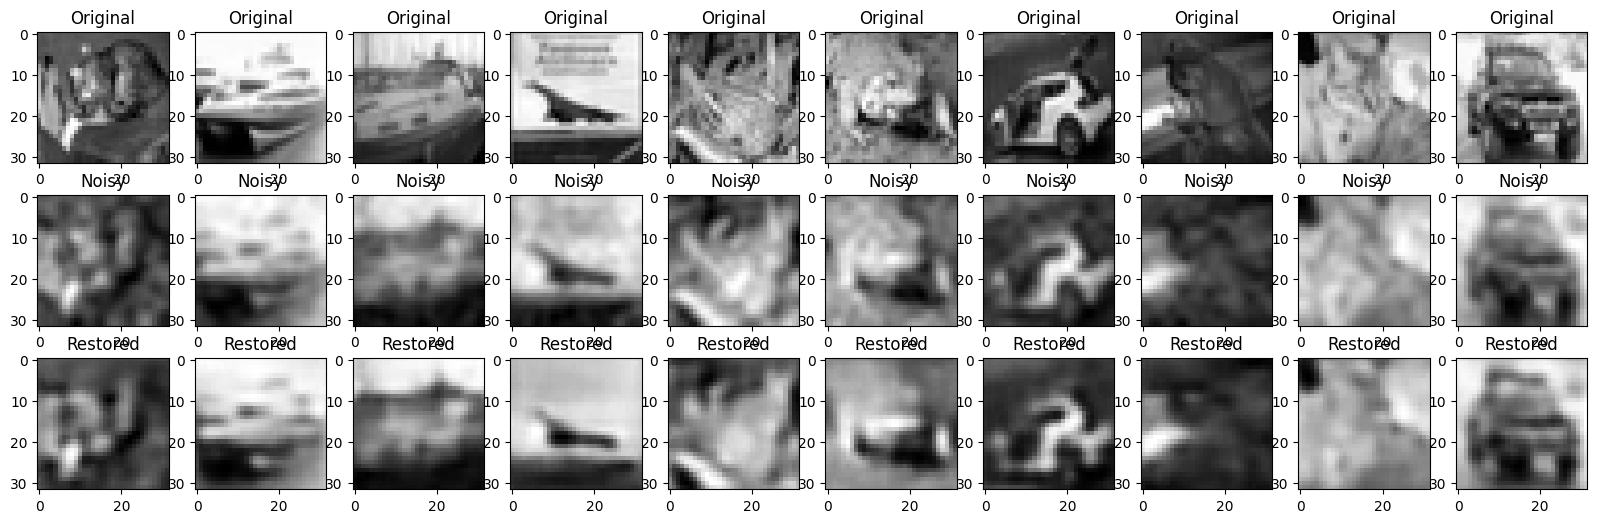

PSNR values:
22.11852
21.919733
23.900942
23.684832
22.089394
24.525362
21.755962
25.64961
24.160448
21.922037


In [ ]:
# Task 2 - autoencoder model


#%pip install tensorflow==2.11
#%pip install opencv-python-headless

import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models



(x_train, y_train), (x_test, y_test) = cifar10.load_data()


x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


x_train_gray = np.mean(x_train, axis=-1, keepdims=True)
x_test_gray = np.mean(x_test, axis=-1, keepdims=True)


def add_noise(img):
    noise = np.random.normal(0, 0.1, img.shape)  # gaussian noise
    return np.clip(img + noise, 0., 1.)

def add_blur(img):
    return cv2.GaussianBlur(img, (5, 5), 0)

# adding noise and blur to the images
x_train_noisy = np.array([add_blur(add_noise(img)) for img in x_train_gray])
x_test_noisy = np.array([add_blur(add_noise(img)) for img in x_test_gray])



def build_autoencoder():
    input_img = layers.Input(shape=(32, 32, 1))

    # encoder
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Dropout(0.2)(x)

    # increase filter size and depth
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Dropout(0.2)(x)

    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)


    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)

    # decoder
    x = layers.Conv2DTranspose(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)

    x = layers.Conv2DTranspose(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)

    x = layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)

    x = layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)

    decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = models.Model(input_img, decoded)
    autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='mean_squared_error')

    return autoencoder


autoencoder = build_autoencoder()
autoencoder.summary()


autoencoder.fit(x_train_noisy, x_train_gray, epochs=100, batch_size=128, validation_data=(x_test_noisy, x_test_gray))


restored_images = autoencoder.predict(x_test_noisy)


n = 10  # no. of images to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # original image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_gray[i].reshape(32, 32), cmap='gray')
    ax.title.set_text('Original')

    # noisy image
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(32, 32), cmap='gray')
    ax.title.set_text('Noisy')

    # restored image
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(restored_images[i].reshape(32, 32), cmap='gray')
    ax.title.set_text('Restored')

plt.show()

#PSNR values
def psnr(y_true, y_pred):
    return tf.image.psnr(y_true, y_pred, max_val=1.0)


psnr_values = [psnr(x_test_gray[i], restored_images[i]) for i in range(n)]


print("PSNR values:")
for value in psnr_values:
    print(value.numpy())  # tensor to a NumPy array to get the value


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set global hyperparameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 10
NUM_CLASSES = len(train_generator.class_indices)


# Data preprocessing
train_dir = '/content/drive/MyDrive/ACV Lab/Dog Breed Classification/train'
val_dir = '/content/drive/MyDrive/ACV Lab/Dog Breed Classification/val'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical')

def build_model(base_model):
    base_model.trainable = False
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.3)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.2)(x)
    predictions = Dense(NUM_CLASSES, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

# Load MobileNet variants
mobilenet_v1 = tf.keras.applications.MobileNet(input_shape=IMAGE_SIZE + (3,), include_top=False, weights='imagenet')
mobilenet_v2 = tf.keras.applications.MobileNetV2(input_shape=IMAGE_SIZE + (3,), include_top=False, weights='imagenet')
mobilenet_v3 = tf.keras.applications.MobileNetV3Large(input_shape=IMAGE_SIZE + (3,), include_top=False, weights='imagenet')

models = {
    'MobileNet V1': build_model(mobilenet_v1),
    'MobileNet V2': build_model(mobilenet_v2),
    'MobileNet V3': build_model(mobilenet_v3),
}

# Compile and train all models
for name, model in models.items():
    print(f"\nTraining {name}...\n")
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(train_generator,
              epochs=EPOCHS,
              validation_data=val_generator)


Found 210 images belonging to 2 classes.
Found 19 images belonging to 2 classes.

Training MobileNet V1...

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.6586 - loss: 1.0986 - val_accuracy: 0.8947 - val_loss: 0.1442
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.9981 - loss: 0.0268 - val_accuracy: 1.0000 - val_loss: 0.0113
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.9908 - loss: 0.0175 - val_accuracy: 1.0000 - val_loss: 0.0373
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.9891 - loss: 0.0363 - val_accuracy: 1.0000 - val_loss: 0.0214
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 1.0000 - loss: 9.3308e-04 - val_accuracy: 1.0000 - val_loss: 0.0050
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.9929 - loss: 0.0120 - val_accuracy: 1.0000 - val_loss: 0.0085
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 1.0000 - val_loss: 0.0149
Epoch 8/10
7/7 ━━━━━

In [3]:
for name, model in models.items():
    val_loss, val_acc = model.evaluate(val_generator)
    print(f"{name} - Validation Accuracy: {val_acc:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0019
MobileNet V1 - Validation Accuracy: 1.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 994ms/step - accuracy: 1.0000 - loss: 5.5683e-04
MobileNet V2 - Validation Accuracy: 1.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 733ms/step - accuracy: 0.5789 - loss: 0.6597
MobileNet V3 - Validation Accuracy: 0.5789


In [ ]:
from google.colab import drive
drive.mount('/content/drive')